# ASSIGNMENT 1

In [3]:
import numpy as np
import pandas as pd
from csv import reader

# Part A: Model Code

In [4]:
wineFile = 'winequality-white.csv'
wineData = pd.read_csv(wineFile, delimiter=";")

print(list(wineData.keys()))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


5) Write a function to calculate and return the Euclidean distance of two vectors.

In [5]:
import math 
from math import sqrt
from math import pow 

def distEuclidean(v1, v2):
    dist = 0
    for i in range(len(v1)):
        dist = dist + pow((v1[i] - v2[i]), 2)
    return sqrt(dist)

In [6]:
distEuclidean([-5,-2,0],[6,0,3])

11.575836902790225

6) Write a function to calculate and return the Manhattan distance of two vectors

In [7]:
def distManhattan(v1, v2):
    dist = 0
    for i in range(len(v1)):
        dist = dist + abs(v1[i] - v2[i])
    return dist

In [8]:
distManhattan(np.array([1.0, 3.2, 4.8, 0.1, 3.2, 0.6, 2.2, 1.1]),
             np.array([0.1, 5.2, 1.9, 4.2, 1.9, 0.1, 0.1, 6.0]))

18.700000000000003

In [9]:
distManhattan([2,3],[8,8])

11

7) Write a function to calculate and return the accuracy and generalization error of two vectors

In [10]:
#pVector = predict vector
#aVector = actual vector
def accuracy_score(y_true, y_pred):
    true_positive = 0
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            true_positive = true_positive + 1
    
    accuracy = true_positive / len(y_true)
    genError = 1 - accuracy  
            
    return accuracy, genError

In [11]:
accuracy_score([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0])

(0.7, 0.30000000000000004)

8) Write three functions to compute: precision, recall and F1 score

In [12]:
#Binary case
def precision_score(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    
    for i in range(len(y_true)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
            else:
                false_positive = false_positive + 1
    
    if((true_positive + false_positive == 0)):
        precision = 0
    else:
        precision = true_positive / (true_positive + false_positive)
    return precision

def recall_score(y_true, y_pred):
    true_positive = 0
    false_negative = 0 
    
    for i in range(len(y_pred)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
        elif(y_pred[i] == 0):
            if (y_pred[i] != y_true[i]):
                false_negative = false_negative + 1
    if((true_positive + false_negative == 0)):
        recall = 0
    else:
        recall = true_positive / (true_positive + false_negative)
    return recall

def f1_score(y_true, y_pred):    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    if ((precision + recall) == 0):
        f1 = 0
    else:
        f1 = 2 * ((precision*recall)/(precision+recall))
    return f1

In [13]:
precision_score([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0])

0.6

9) Write a function to compute the confusion matrix of two vectors

In [58]:
def confusion_matrix(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    true_negative = 0 
    false_negative = 0
    
    for i in range(len(y_true)):
        if(y_pred[i] == 1):
            if(y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
            else:
                false_positive = false_positive + 1
        else:
            if(y_pred[i] == y_true[i]):
                true_negative = true_negative + 1
            else:
                false_negative = false_negative + 1
                
    matrix = [[true_positive,false_positive],[false_negative,true_negative]]
        
    return matrix

In [15]:
confusion_matrix([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0])

[[4, 2], [1, 3]]

10) Write a function to generate the Receiver Operating Characteristic (ROC) curve

In [16]:
def roc_curve(confusionMatrix):
    #Using sklearn: y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]
    threshold = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3, 0.2, 0.1, 0]
    true_positive = confusionMatrix[1][1]
    positive = confusionMatrix[1][0] + confusionMatrix[1][1]
    false_negative = confusionMatrix[1][0]
    negative = confusionMatrix[0][0] + confusionMatrix[1][1]
    
    true_pos_rate = true_positive / postive 
    false_pos_rate = false_positive / negative 
    
    return true_pos_rate, false_pos_rate
    
def plot_roc_curve():
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

11) Write a function to compute area under curve (AUC) for the ROC curve 

In [17]:
from numpy import trapz

def roc_auc(x, y):
    area = trapz(y, x, dx=0.1)
    
    return area

12) Write a function to generate the precision-recall curve

In [18]:
def precision_recall_curve(y_true, y_scores):
    precision = precision_score(y_true, y_scores)
    recall = recall_score(y_true, y_scores)
    
    return 

13) Write a kNN model class

a. fit() function: 
    1. No return value necessary
    2. For kNN, this function simply needs to store the relevant values as instance variables
    3. training_features is a numpy array with rows representing data samples and columns representing features
    4. training_labels is a numpy array with labels corresponding to each row of training_features
    5. k is the number of nearest neighbors
    6. distance_f is an arbitrary distance function
    7. kwargs is a dictionary of arguments to be passed to the distance function (this will not be used with our simple distance functions, but is important for more complex functions)
        i. If you are not familiar, look up using the ** operator to unpack dictionaries as arguments
b. predict() function:
    1. Returns numpy array of kNN predictions for each row in test_features.
    2. test_features is numpy array containing samples to be tested. Same format as training_features.
    3. It will use the instance variables stored by the fit function to carry out kNN
    4. 878 students (BONUS for 478): include the option to weight the solution by inverse distance (add an extra parameter to the function call for this)
c. __init__() function:
    1. Standard python initialization function so we can instantiate the class.
    2. Doesn’t need to do anything in this case, can just ‘pass’

In [19]:
#Reminder: there is no training in knn. X_test and y_test are 
#for cross validation
'''
def fit(X_train, y_train , p, k_value):
    # Note: p = 1 is Manhattan, p = 2 is Euclidean
    for i in y_train:
        distances = []
        for j in X_train:
            if (p == 1):
                dist = distManhattan(i, j, len(y_train)-1)
            elif (p == 2):
                dist = distEuclidean(y_train, X_train[x])
        distances.append((X_train[x], dist))
        knn = distances[:k_value]
    #TODO: NOT FINISHED
        #Note: find min dist
        distances.sort(key = operator.itemgetter(1))
'''

class kNNModel:
    
    '''
    Reminder: for a given data point we want to predict
        1. Calculate distances between that point and all other points
        2. Find nearest neighbours by ranking in increasing distance.
        3. Vote on the predicted class labels based on teh classses of
        the k nearest neighbours
    '''
    neighbors = []
    training_features = []
    training_labels = []
    k = []
    distance_f = []
    sortedVote = []
    
    def fit(self,training_features,training_labels,k,distance_f):
        self.training_features = np.array(training_features)
        self.training_labels = np.array(training_labels)
        self.k = k 
        self.distance_f = distance_f 
        return 
    
    def predict(self,test_features_arg):
        test_features = np.array(test_features_arg)
        distances = []
        for i in range(len(self.training_features)):
            if(self.distance_f == 1):
                dist = distManhattan(self.training_features[i],test_features)
                distances.append([test_features, dist, self.training_labels[i]])
            elif(self.distance_f == 2):
                dist = distEuclidean(self.training_features[i],test_features)
                distances.append([test_features, dist, self.training_labels[i]])
            else:
                #default
                dist = distManhattan(self.training_features[i],test_features)
                distances.append([test_features, dist, self.training_labels[i]])
        distances.sort()
        self.neighbors = distances[:self.k]

        #Calculate most frequent class in neighbors 
        votes = [[0,0],[1,0]]
        for i in range(len(self.neighbors)-1):
            vote = int(self.neighbors[i][2])
            if (vote == 1):
                votes[1][1] += 1
            elif(vote == 1):
                votes[0][1] += 1
        #sortedVotes = sorted(votes.iteritems(), key=operator.itemgetter(1), reverse=True)
        maxVote = 0
        if(votes[1][1] > votes[1][0]):
            maxVote = votes[1][0]
        else:
            maxVote = votes[0][0]

        
        return maxVote
        
        

    def __init__(self):
        pass 


# Part B: Data Processing

14) Read in the ‘winequality-white.csv’ file as a pandas data frame

In [20]:
wineFile = 'winequality-white.csv'
wineData = pd.read_csv(wineFile, delimiter=";")

print(list(wineData.keys()))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


15) The target will be the ‘quality’ columnwhich represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine).

In [21]:
X = wineData 
#Drop quality 
# Target Vector
y = (wineData["quality"] > 5).astype(np.int) # 1 if > 5 ( = "good") , else 0 (= "bad")

X = X.drop(columns=["quality"])

In [22]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000


In [23]:
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      0
11      0
12      0
13      1
14      0
15      1
16      1
17      1
18      1
19      0
20      1
21      1
22      1
23      0
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4868    1
4869    1
4870    1
4871    1
4872    0
4873    1
4874    1
4875    1
4876    1
4877    0
4878    0
4879    1
4880    1
4881    1
4882    0
4883    1
4884    0
4885    1
4886    1
4887    1
4888    0
4889    1
4890    1
4891    1
4892    0
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64

16) Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles(3 pts).

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


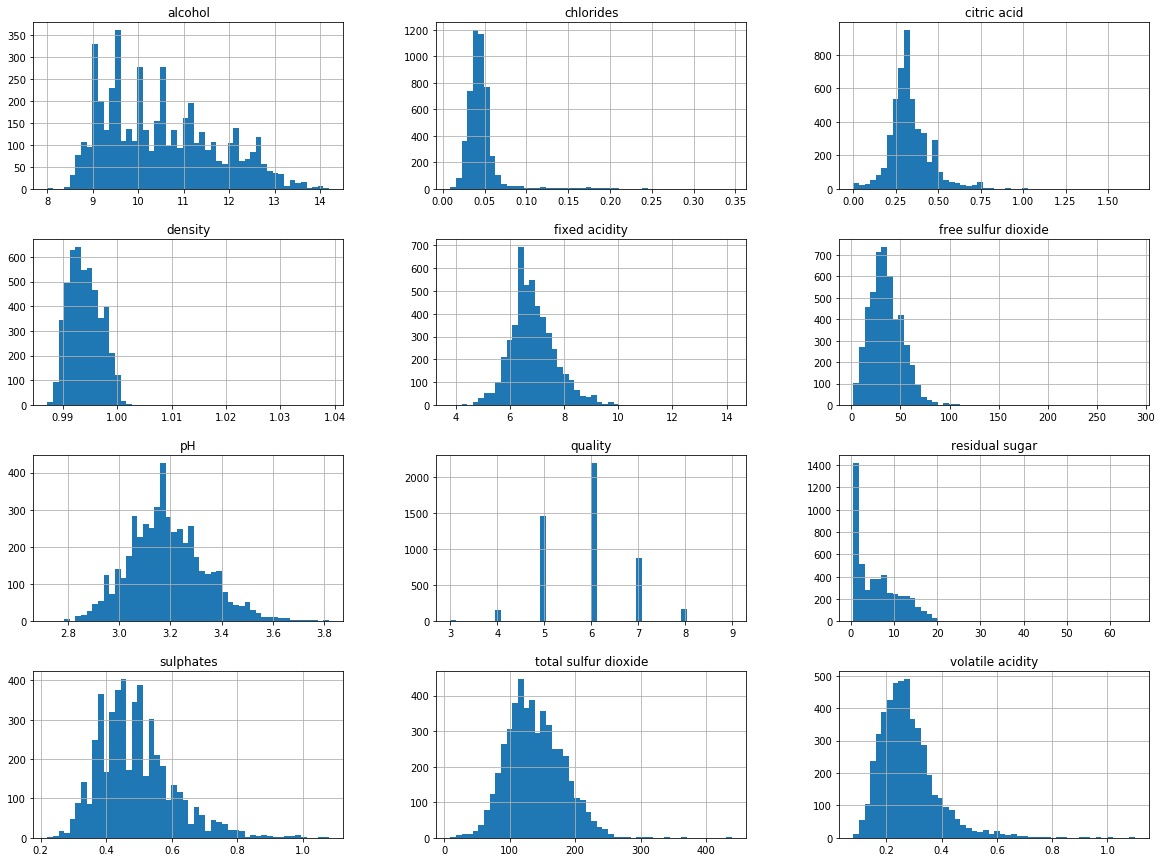

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

wineData.hist(bins=50, figsize=(20,15))
wineData.describe()

17) Shuffle the rows of your data - we don’t want the order the data is imported in to affect our findings

In [25]:
wineData = wineData.sample(frac=1)

In [26]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2779,6.7,0.20,0.37,1.65,0.025,42.0,103.0,0.99022,3.11,0.45,11.4,5
4688,6.7,0.16,0.32,12.50,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6
3332,6.5,0.22,0.28,3.70,0.059,29.0,151.0,0.99177,3.23,0.41,12.1,7
2592,7.3,0.32,0.29,1.50,0.038,32.0,144.0,0.99296,3.20,0.55,10.8,5
1706,6.4,0.24,0.22,1.50,0.038,38.0,157.0,0.99340,3.41,0.55,9.9,6


18) Generate pair plots using the seaborn package (see first recitation notebook). You need to identify and report the redundant features.

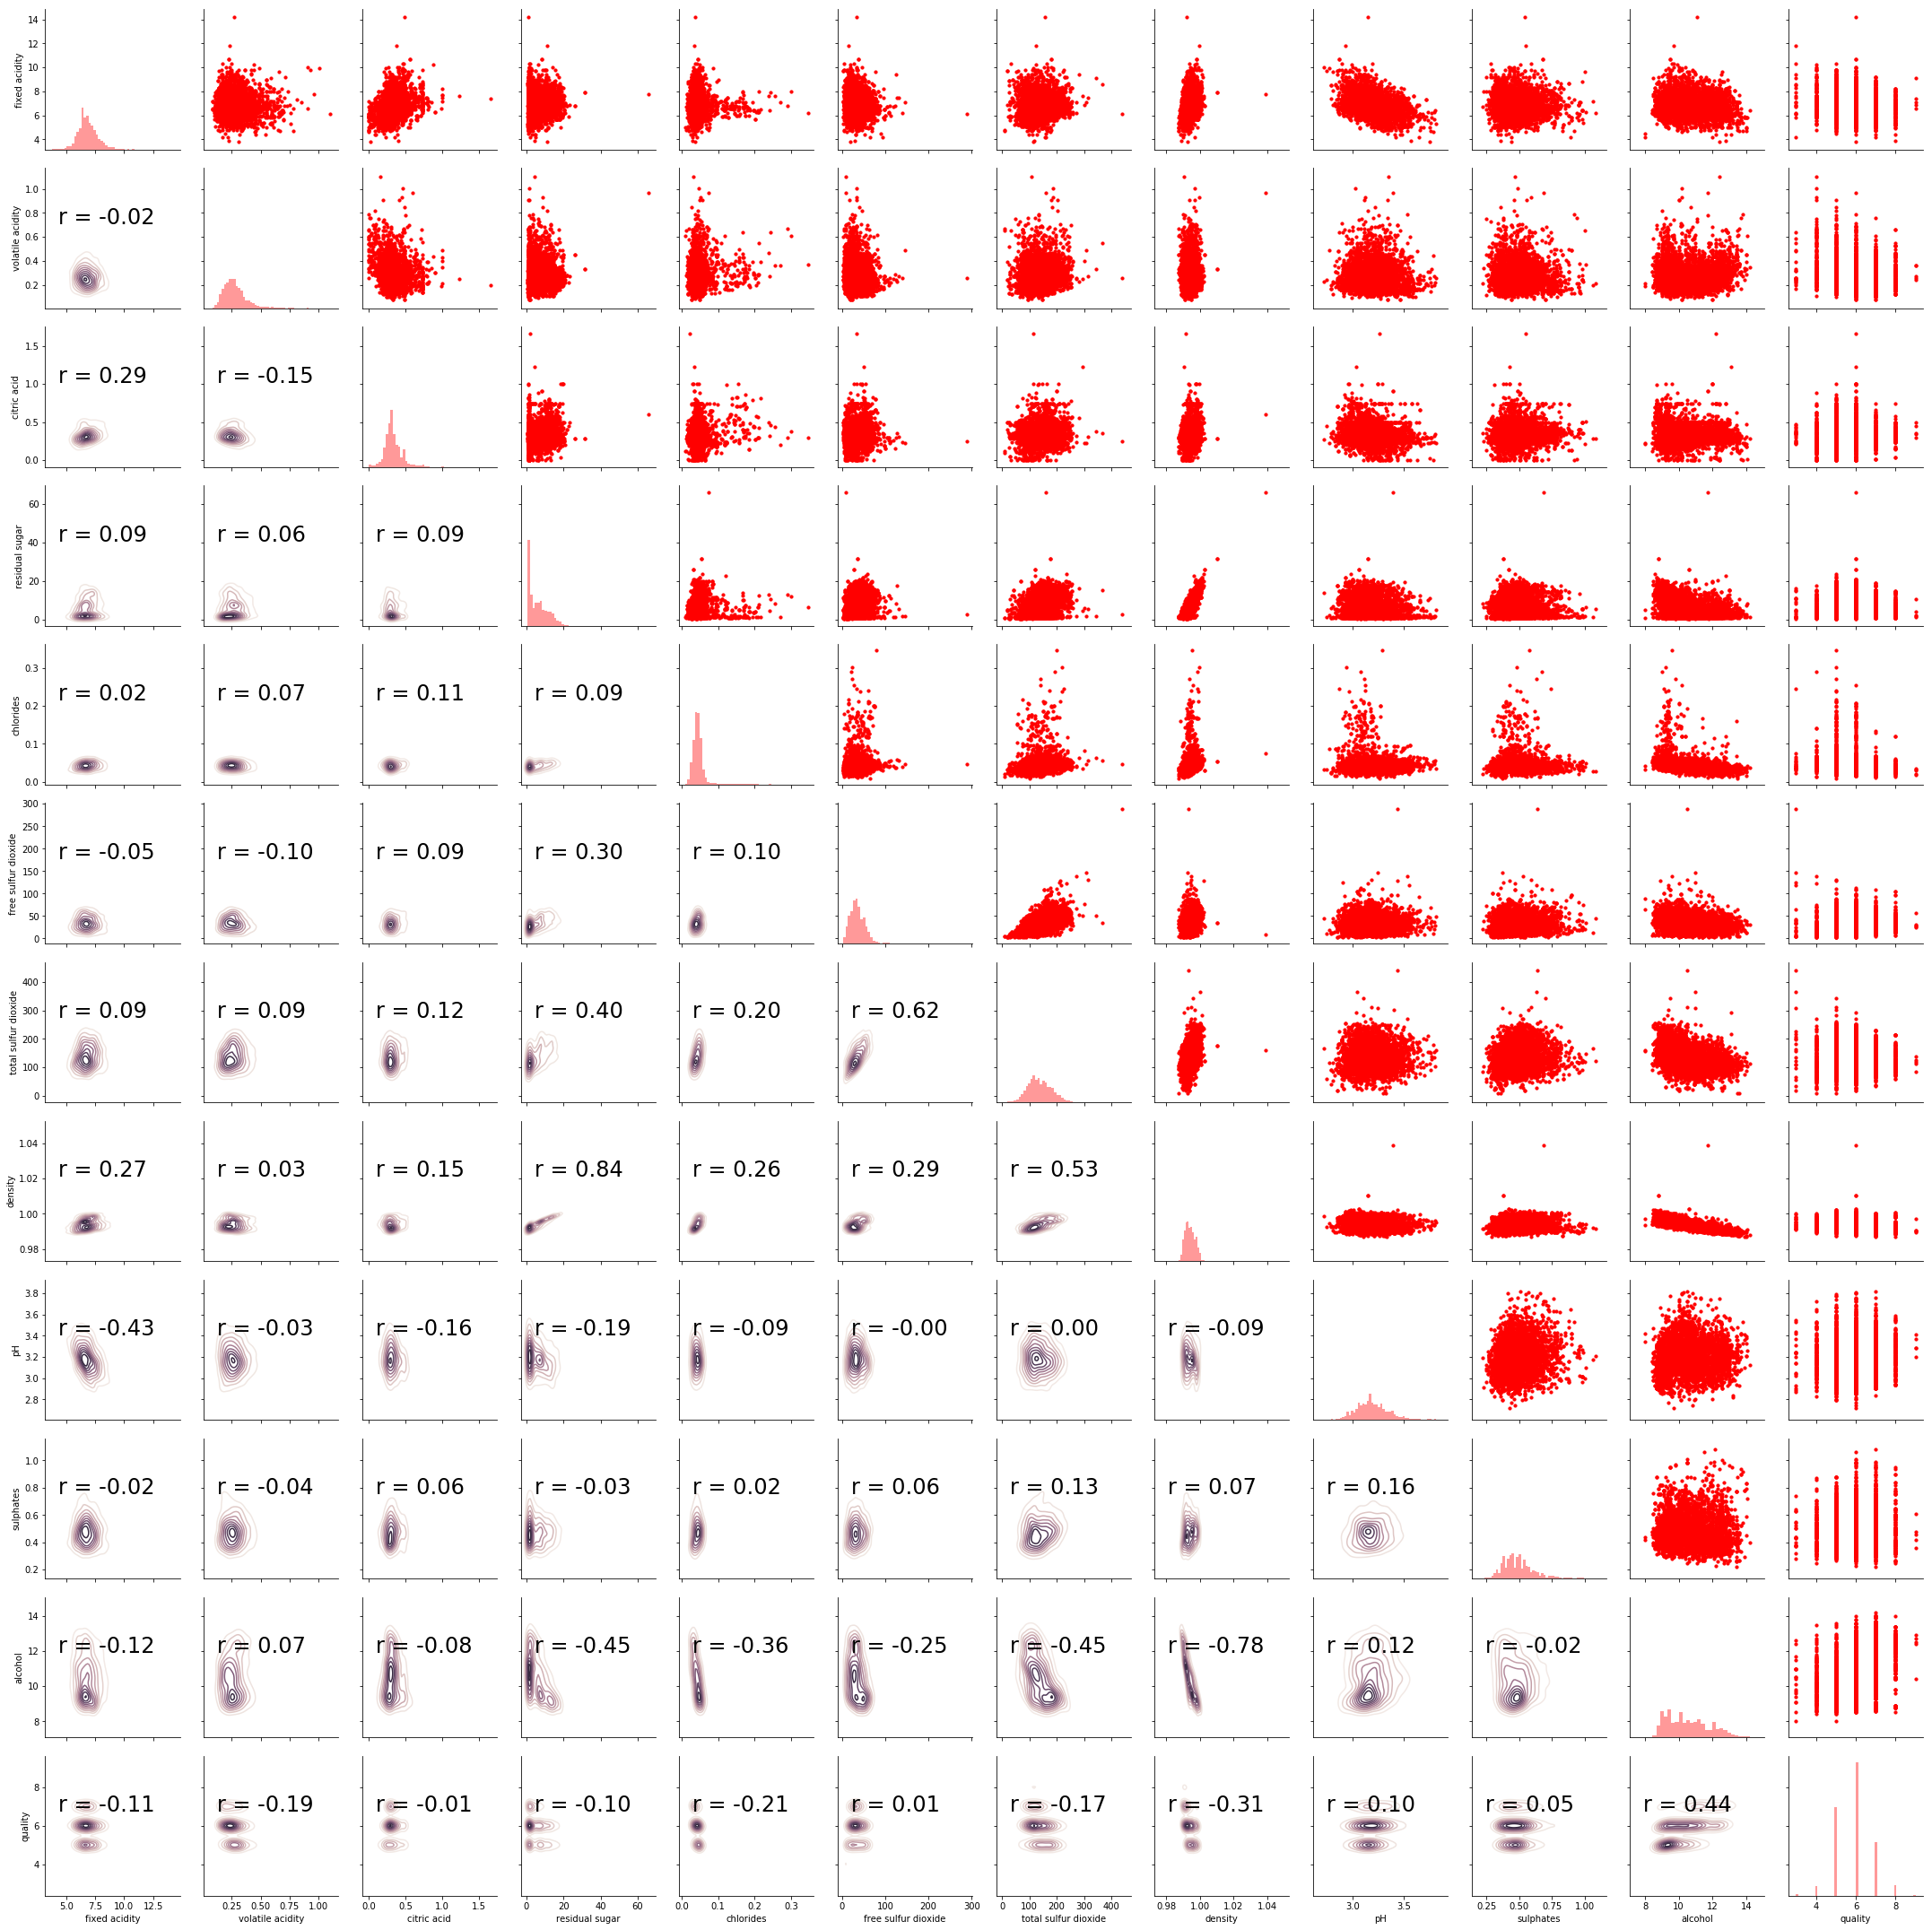

In [27]:
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24) 

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(wineData)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);


19) Drop the redundant features 

In [28]:
#wineData.corr()['quality'].sort_values(ascending=False)

corr_matrix = wineData.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(corr_matrix)
print(high_corr_var)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.022697     0.289181   
volatile acidity           0.022697          1.000000     0.149472   
citric acid                0.289181          0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide        0.049396          0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                         0.425858          0.031915     0.163748   
sulphates                  0.017143          0.035728     0.062331   
alcohol                    0.120881          0.067718     0.075729   
quality                    0.113663          0.194723     0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [29]:
X = X.drop(columns=["density"])

20) Write a function named "partition" to split your data into train and test set. The function should take 3 arguments: feature matrix (numpy array with rows representing data samples and columns representing features.), target vector (numpy array with labels corresponding to each row of teh feature matrix), t. Here t is a real number to determine the size of partition. For example, if t is set to 0.2, then 80% of tehh data will be used for training and 20% for testing. This function should return two feature matrices for train and test data, and two target vectors for train test data. 

In [30]:
def partition(X, y,t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    return X_train, y_train, X_test, y_test

In [31]:
X_train, y_train, X_test, y_test = partition(X, y, 0.2)

In [32]:
print("X size: ", len(X))
print("X_train size: ", len(X_train))
print("X_test size: ", len(X_test))
print("y_train size: ", len(y_train))
print("y_test size: ", len(y_test))

X size:  4898
X_train size:  3919
X_test size:  979
y_train size:  3919
y_test size:  979


In [33]:
np.array(X_test)

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.6 ,  0.13,  0.3 , ...,  3.51,  0.45, 10.3 ],
       [ 6.5 ,  0.14,  0.33, ...,  3.25,  0.49,  8.6 ],
       [ 7.7 ,  0.28,  0.33, ...,  3.39,  0.62, 10.7 ]])

In [34]:
np.array(y_train)

array([0, 1, 1, ..., 1, 1, 1])

In [35]:
np.array(X_train)

array([[ 6.  ,  0.2 ,  0.71, ...,  3.12,  0.47,  9.8 ],
       [ 6.  ,  0.19,  0.71, ...,  3.12,  0.46,  9.8 ],
       [ 7.7 ,  0.28,  0.33, ...,  3.39,  0.62, 10.7 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [36]:
y_train

979     0
980     1
981     1
982     1
983     1
984     0
985     1
986     1
987     1
988     0
989     1
990     1
991     0
992     0
993     0
994     1
995     1
996     0
997     1
998     1
999     1
1000    1
1001    0
1002    1
1003    1
1004    1
1005    1
1006    1
1007    0
1008    1
       ..
4868    1
4869    1
4870    1
4871    1
4872    0
4873    1
4874    1
4875    1
4876    1
4877    0
4878    0
4879    1
4880    1
4881    1
4882    0
4883    1
4884    0
4885    1
4886    1
4887    1
4888    0
4889    1
4890    1
4891    1
4892    0
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 3919, dtype: int64

21) Naively run your kNN model on the train dataset with k = 5 and using Euclidean distance. 

    a. Use accuracy and F1 score to compare your predictions to the expected labels
    
    b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.
    
    c. Return the kNN model on teh standardized data, find the accuracy and F1 score with the expected labels 
    
    d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assigment. 

In [37]:
knn = kNNModel()

#def fit(self,training_features,training_labels,k,distance_f,kwargs):

knn.fit(X_train,y_train, 5, 1)

In [38]:
print(np.array(X_test))

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.6   0.13  0.3  ...  3.51  0.45 10.3 ]
 [ 6.5   0.14  0.33 ...  3.25  0.49  8.6 ]
 [ 7.7   0.28  0.33 ...  3.39  0.62 10.7 ]]


In [39]:
knn.training_features[1]

array([ 6.   ,  0.19 ,  0.71 ,  1.5  ,  0.152,  9.   , 55.   ,  3.12 ,
        0.46 ,  9.8  ])

In [40]:
np.array(X_test)[5]

array([8.10e+00, 2.80e-01, 4.00e-01, 6.90e+00, 5.00e-02, 3.00e+01,
       9.70e+01, 3.26e+00, 4.40e-01, 1.01e+01])

In [41]:
knn.predict(np.array(X_test)[5])

1

In [42]:
knn.neighbors

[[array([8.10e+00, 2.80e-01, 4.00e-01, 6.90e+00, 5.00e-02, 3.00e+01,
         9.70e+01, 3.26e+00, 4.40e-01, 1.01e+01]), 5.446000000000001, 1],
 [array([8.10e+00, 2.80e-01, 4.00e-01, 6.90e+00, 5.00e-02, 3.00e+01,
         9.70e+01, 3.26e+00, 4.40e-01, 1.01e+01]), 5.467, 1],
 [array([8.10e+00, 2.80e-01, 4.00e-01, 6.90e+00, 5.00e-02, 3.00e+01,
         9.70e+01, 3.26e+00, 4.40e-01, 1.01e+01]), 6.437999999999999, 1],
 [array([8.10e+00, 2.80e-01, 4.00e-01, 6.90e+00, 5.00e-02, 3.00e+01,
         9.70e+01, 3.26e+00, 4.40e-01, 1.01e+01]), 6.532999999999998, 1],
 [array([8.10e+00, 2.80e-01, 4.00e-01, 6.90e+00, 5.00e-02, 3.00e+01,
         9.70e+01, 3.26e+00, 4.40e-01, 1.01e+01]), 7.316, 1]]

In [43]:
import numpy as np
from numpy import *
def predict_set(X_test,knn):
    prediction = [1] * len(X_test)
    for k in range(len(X_test)-1):
        prediction[k] = knn.predict(X_test[k])
    return prediction

def partitionHelper(data,folds):
    return np.array_split(data, folds)

def cross_val(training_features,training_labels,model,j,i,error_function,folds):
    partition = partitionHelper(np.array(training_features),folds)
    labels_partition = partitionHelper(np.array(training_labels),folds)
    a2 = []
    
    for l in range(len(partition)-1):
        test_set = partition[l]
        test_label = labels_partition[l]
        train_set_unflattened = partition.copy()
        train_label_unflattened = labels_partition.copy()
        del train_set_unflattened[l]
        del train_label_unflattened[l]

        train_set = [y for x in train_set_unflattened for y in x]
        train_label = [y for x in train_label_unflattened for y in x]
                
        mean  = np.mean(train_set, axis=0)
        std = np.std(train_set, axis=0)
        train_set = (train_set - mean) / std
                
        test_set = (test_set - mean) / std

        model.fit(train_set,train_label, j, i)
        #for k in range(len(partition[l])-1):
        #    prediction[k] = model.predict(partition[l][k])
        prediction = predict_set(test_set,model) 
        if (error_function.lower() == 'f1'):
            accuracy = f1_score(prediction, test_label)
            a2.append(accuracy)
        elif (error_function.lower() == 'precision'):
            accuracy = precision_score(prediction, test_label)
            a2.append(accurary)
        elif (error_function.lower() == 'accuracy'):
            accuracy = accuracy_score(prediction, test_label)
        elif(error_function.lower() == 'recall'):
            accuracy = recall_score(prediction, test_label)
            a2.append(accuracy)
        else:
            accuracy = f1_score(prediction, test_label)
            a2.append(accuracy)
    return {'average_error': a2, 'pred': prediction, 'labels': test_label, "k":j, "distance":i}

#    def fit(self,training_features,training_labels,k,distance_f):

def sFold(folds, training_features, training_labels, model, model_args, error_function):
    accuracyMatrix = []
    n_neighbors = model_args[0]
    p = model_args[1]
    #predictions = np.array([])
    total_cross_val = []
    
    for i in p:
        a = []
        cross_val2 = []
        for j in n_neighbors:
            a2 = cross_val(np.array(training_features),np.array(training_labels),model, j,i,error_function,folds)
            cross_val2.append(a2)
            a.append(mean(a2['average_error'])/folds)
        accuracyMatrix.append(a)
        total_cross_val.append(cross_val2)
    
    i_index = 0
    j_index = 0
    maxAccuracy = accuracyMatrix[0][0]
    for i in range(len(accuracyMatrix)):
        for j in range(len(accuracyMatrix[0])):
            if(maxAccuracy < accuracyMatrix[i][j]):
                maxAccuracy = accuracyMatrix[i][j]
                i_index = i
                j_index = j
    print("Max Error Function:", maxAccuracy)
    print("Max Weight: ", p[i_index])
    print("Max Neighbor: ", n_neighbors[j_index])

    return total_cross_val[i_index][j_index]




23. Use your S-fold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets: 
    
    a. k = [1, 5, 9, 11]
    
    b. distance = [Euclidean, Manhattan]
    
    c. Store the returned dictionary for each. We will need these for the report
    
    d. Determine the best model based on the overall performance (lowest average error). For the error_function of the S-fold function argument use the F1 score function.

In [44]:
# def sFold(folds, training_features, training_labels, model, model_args, error_fuction):

sFold(3, X_train,y_train, knn, [[1,5,9,11], [1,2]], "f1")


Max Error Function: 0.26955216302349044
Max Weight:  1
Max Neighbor:  11


{'average_error': [0.7835153922542205, 0.8337975858867223],
 'pred': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  

24. Evaluate your model on the test data and report the performance measures 

    a. Precision
    
    b. Recall 
    
    c. F1 score
    
    d. Confusion matrix
    
    e. Accuracy 

In [45]:
#   def fit(self,training_features,training_labels,k,distance_f):
#   def predict(self,test_features_arg):

knn.fit(X_train,y_train, 11,2)
#predicted = predict_set(np.array(X_test),knn,5,1)
scores = cross_val(np.array(X_test),np.array(y_test),knn,knn.k,knn.distance_f,"f1",3)
score = scores['average_error']

print("Accuracy: %0.2f (+/- %0.2f)" % (mean(score), std(score) * 2))

Accuracy: 0.78 (+/- 0.05)


In [46]:
import numpy as np, scipy.stats as st

st.t.interval(0.95, len(score)-1, loc=np.mean(score), scale=st.sem(score))

(0.4587513661295474, 1.098385009879889)

In [48]:
predicted = scores['pred']
label = scores['labels']

In [49]:
predicted

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [50]:
precision_score(np.array(predicted), np.array(label))

0.9953703703703703

In [51]:
accuracy_results = accuracy_score(np.array(predicted), np.array(label))
print("Accuracy:",accuracy_results[0])
print("Generalization Error:",accuracy_results[1])

Accuracy: 0.6779141104294478
Generalization Error: 0.3220858895705522


In [52]:
recall_score(np.array(predicted), np.array(label))

0.6739811912225705

In [53]:
f1_score(np.array(predicted), np.array(label))

0.8037383177570093

In [54]:
# Confidence interval

import math
import statistics
n = len(y_test)
z = 1.96 # given via slides
genError = accuracy_results[1]

print("95% Confidence Interval on Generalization Error")

stderror = math.sqrt(genError * (1-genError) / n)

print("Lower bound:", genError - z * stderror)
print("Upper bound:", genError + z * stderror)

95% Confidence Interval on Generalization Error
Lower bound: 0.29281486584240696
Upper bound: 0.3513569132986974


In [60]:
confusion = confusion_matrix(np.array(predicted), np.array(label))
print(confusion)

[[215, 1], [104, 6]]


In [62]:
# TP/ FP
# TN/ FN
print("TP/ FP:",confusion[0][0] / confusion[0][1])
print("TN/ FN:",confusion[1][1] / confusion[1][0])

TP/ FP: 215.0
TN/ FN: 0.057692307692307696
